# Reproducibility check

Explanation: We had to rerun panan a couple times due to tiles colation problems. We want to be able to still use older parts of the run that were correct, but in order to do that we need to check if both the correct retiled poutput of the older run matches the correct retiled output of the new run. 

In [1]:
import cosima_cookbook as cc
from cosima_cookbook import distributed as ccd
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean.cm as cmocean

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

**List of files with CORRRECT COLLATION**:

-On gdata/ik11:output000:107 (all on gdata)

-On Panan_BU_tiles: output107:output111

-On Panan_BU_SEP22nd: output108,


**List of files with INCORRECT COLLATION**:

-On Panan_BU_tiles: output112,output113



**List of outputs with MISSING TILES** :

-On Panan_BU_tiles: output114(71 tiles), output115 (61,output117 (2 tiles), output118 (14 tiles)

-On ./archive: output112 (83 tiles), output113 (no tiles of ocean_month.nc), output114  (71), output115 (61),output115 (2 tiles),
output118 (14 tiles)



**List of uncollated outputs WITH ALL TILES** :

-On Panan_BU_tiles: output116

-On ./archive: output116


ps: all files in ./archive are not colalted

Lets first compare the output107 beteen ./archive and panan_BU_tiles. Are they equal?

## 2d vars in ocean_month.nc

#### output107

In [4]:
#on backup folder
BU107_ocean_month=xr.open_dataset('/scratch/oz91/wf4500/panan_BU_tiles/output107/19991201.ocean_month.nc')
#on gdata/ik11
IK107_ocean_month=xr.open_dataset('/g/data/ik11/outputs/mom6-panan/panant-0025-zstar-ACCESSyr2/output107/19991201.ocean_month.nc')

In [7]:
out107diff=BU107_ocean_month-IK107_ocean_month

<xarray.Dataset>
Dimensions:     (xh: 14400, yh: 3383, time: 1, nv: 2, xq: 14401, yq: 3384)
Coordinates:
  * xh          (xh) float64 -280.0 -280.0 -279.9 -279.9 ... 79.94 79.96 79.99
  * yh          (yh) float64 -81.09 -81.08 -81.07 ... -37.03 -37.01 -36.99
  * time        (time) object 1999-12-16 12:00:00
  * nv          (nv) float64 1.0 2.0
  * xq          (xq) float64 -280.0 -280.0 -279.9 -279.9 ... 79.95 79.97 80.0
  * yq          (yq) float64 -81.1 -81.09 -81.08 -81.07 ... -37.02 -37.0 -36.98
Data variables: (12/15)
    zos         (time, yh, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    tob         (time, yh, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    sob         (time, yh, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    mlotst      (time, yh, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    umo_2d      (time, yh, xq) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    vmo_2d      (time, yq, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    ...          ...
    wfo         (time, yh, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    salt_flux   (time, yh, xh) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    average_T1  (time) timedelta64[ns] 00:00:00
    average_T2  (time) timedelta64[ns] 00:00:00
    average_DT  (time) timedelta64[ns] 00:00:00
    time_bnds   (time, nv) timedelta64[ns] 00:00:00 00:00:00

In [43]:
figdir='/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/figs/'

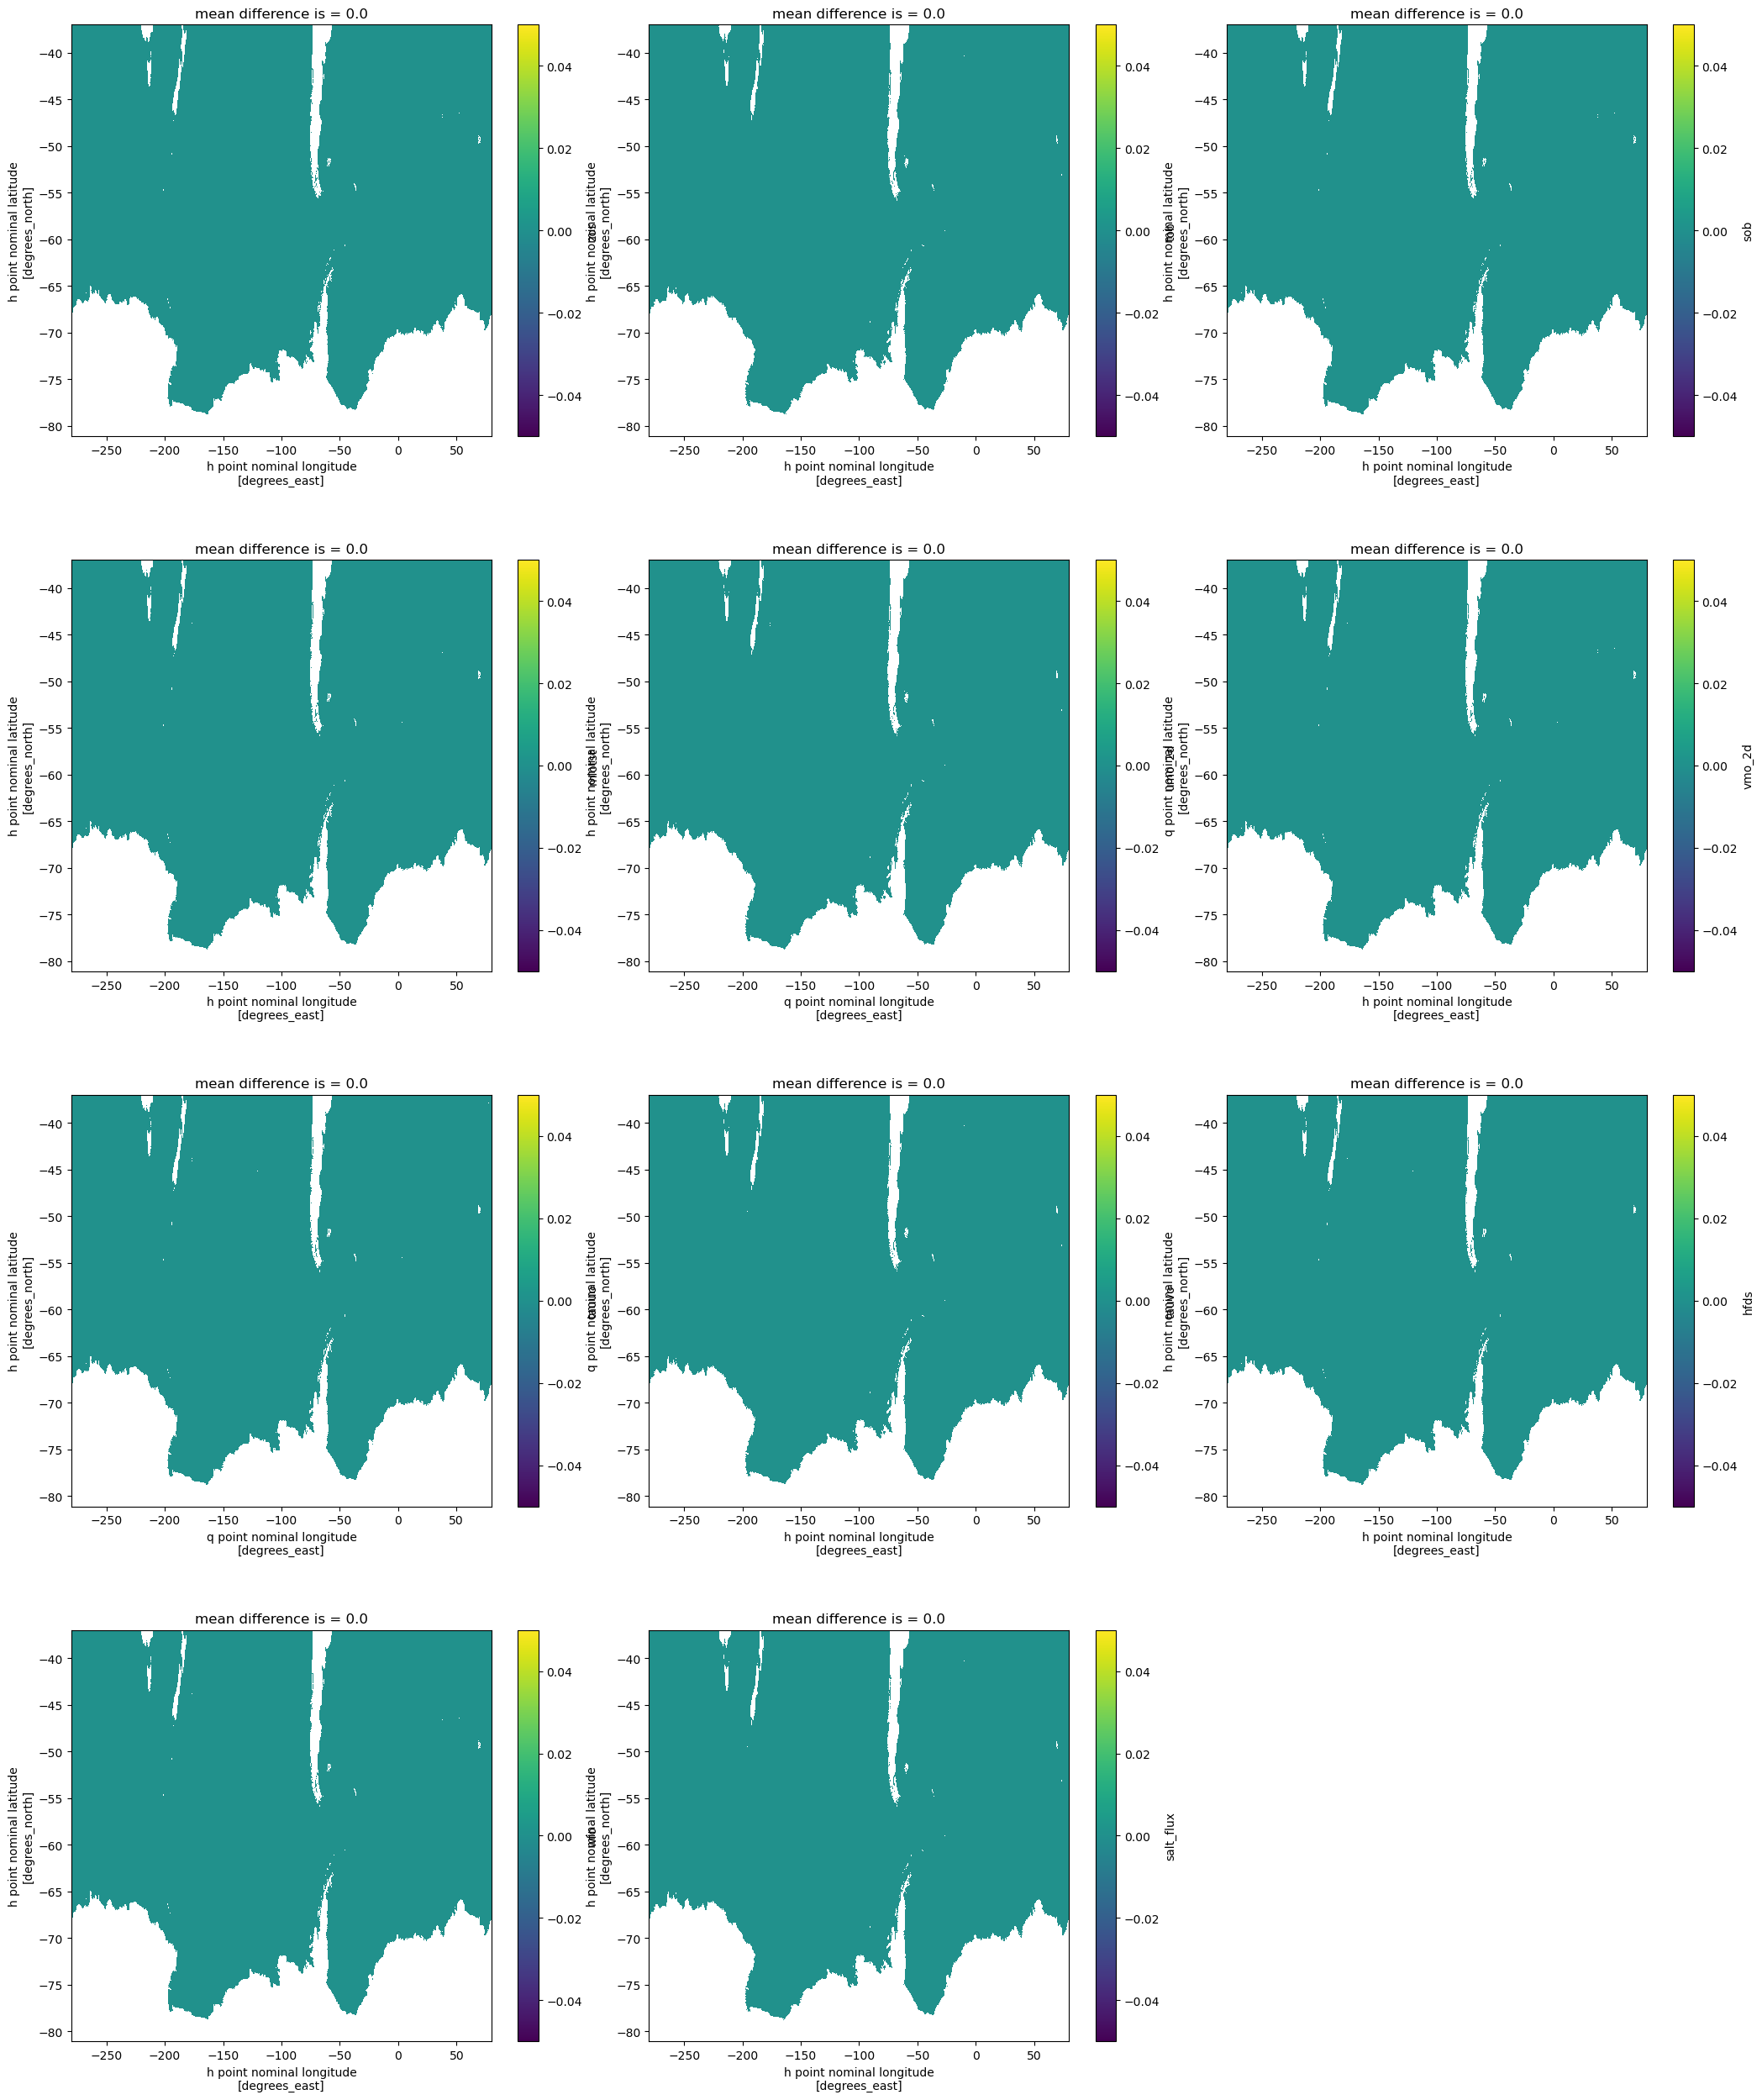

In [44]:
figure = plt.figure(num = 1, figsize = (25, 30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.3)


plt.subplot(4,3,1)
#zos
Delta_zos_flux=out107diff.isel(time=0).zos.mean().values #mean difference between fields
out107diff.isel(time=0).zos.plot()
plt.title("mean difference is = " +str(Delta_zos_flux))

plt.subplot(4,3,2)
#tob
Delta_tob_flux=out107diff.isel(time=0).tob.mean().values #mean difference between fields
out107diff.isel(time=0).tob.plot()
plt.title("mean difference is = " +str(Delta_tob_flux))

plt.subplot(4,3,3)
#sob
Delta_sob_flux=out107diff.isel(time=0).sob.mean().values #mean difference between fields
out107diff.isel(time=0).sob.plot()
plt.title("mean difference is = " +str(Delta_sob_flux))

plt.subplot(4,3,4)
#mlotst
Delta_mlotst_flux=out107diff.isel(time=0).mlotst.mean().values #mean difference between fields
out107diff.isel(time=0).mlotst.plot()
plt.title("mean difference is = " +str(Delta_mlotst_flux))

plt.subplot(4,3,5)
#umo_2d
Delta_umo_2d_flux=out107diff.isel(time=0).umo_2d.mean().values #mean difference between fields
out107diff.isel(time=0).umo_2d.plot()
plt.title("mean difference is = " +str(Delta_umo_2d_flux))

plt.subplot(4,3,6)
#vmo_2d
Delta_vmo_2d_flux=out107diff.isel(time=0).vmo_2d.mean().values #mean difference between fields
out107diff.isel(time=0).vmo_2d.plot()
plt.title("mean difference is = " +str(Delta_vmo_2d_flux))


plt.subplot(4,3,7)
#tauuo
Delta_tauuo_flux=out107diff.isel(time=0).tauuo.mean().values #mean difference between fields
out107diff.isel(time=0).tauuo.plot()
plt.title("mean difference is = " +str(Delta_tauuo_flux))

plt.subplot(4,3,8)
#tauvo
Delta_tauvo_flux=out107diff.isel(time=0).tauvo.mean().values #mean difference between fields
out107diff.isel(time=0).tauvo.plot()
plt.title("mean difference is = " +str(Delta_tauvo_flux))

plt.subplot(4,3,9)
#hdfs
Delta_hfds_flux=out107diff.isel(time=0).hfds.mean().values #mean difference between fields
out107diff.isel(time=0).hfds.plot()
plt.title("mean difference is = " +str(Delta_hfds_flux))

plt.subplot(4,3,10)
#wfo
Delta_wfo_flux=out107diff.isel(time=0).wfo.mean().values #mean difference between fields
out107diff.isel(time=0).wfo.plot()
plt.title("mean difference is = " +str(Delta_wfo_flux))

plt.subplot(4,3,11)
#salt_flux
Delta_salt_flux=out107diff.isel(time=0).salt_flux.mean().values #mean difference between fields
out107diff.isel(time=0).salt_flux.plot()
plt.title("mean difference is = " +str(Delta_salt_flux))


plt.savefig(figdir+"output107diff_ocean_month.png",bbox_inches='tight',dpi=300)

It seems that all 2d vars are the same between the runs. However, these are the immediate month after the restart ( they both come from the same restart). It might be useful to compare dates that are more distant from the initial restart. Lets do it below

#### output108

I know output108 aint that different form 107, but it is one of the lastest with correct collation. Lets compare the one on panan_BU_tiles with the one in panan_BU_Sep22nd

In [37]:
#on backup folder
BU108_ocean_month=xr.open_dataset('/scratch/oz91/wf4500/panan_BU_tiles/output108/20000101.ocean_month.nc')
#on gdata/ik11
SEP108_ocean_month=xr.open_dataset('/scratch/oz91/wf4500/panan_BU_SEP22nd/output108/20000101.ocean_month.nc')

SEP108_ocean_month

<xarray.Dataset>
Dimensions:          (xh: 14400, yh: 3383, time: 1, nv: 2, xq: 14401, yq: 3384)
Coordinates:
  * xh               (xh) float64 -280.0 -280.0 -279.9 ... 79.94 79.96 79.99
  * yh               (yh) float64 -81.09 -81.08 -81.07 ... -37.03 -37.01 -36.99
  * time             (time) object 2000-01-16 12:00:00
  * nv               (nv) float64 1.0 2.0
  * xq               (xq) float64 -280.0 -280.0 -279.9 ... 79.95 79.97 80.0
  * yq               (yq) float64 -81.1 -81.09 -81.08 ... -37.02 -37.0 -36.98
Data variables: (12/20)
    zos              (time, yh, xh) float32 ...
    tob              (time, yh, xh) float32 ...
    sob              (time, yh, xh) float32 ...
    mlotst           (time, yh, xh) float32 ...
    umo_2d           (time, yh, xq) float32 ...
    vmo_2d           (time, yq, xh) float32 ...
    ...               ...
    lrunoff          (time, yh, xh) float32 ...
    frunoff          (time, yh, xh) float32 ...
    average_T1       (time) datetime64[ns] ...
    average_T2       (time) datetime64[ns] ...
    average_DT       (time) timedelta64[ns] ...
    time_bnds        (time, nv) timedelta64[ns] ...
Attributes:
    title:             panan
    associated_files:  areacello: 20000101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           20230823T0212Z: /g/data/ik11/inputs/mom6/panan/0025deg...

In [39]:
out108diff=BU108_ocean_month - SEP108_ocean_month

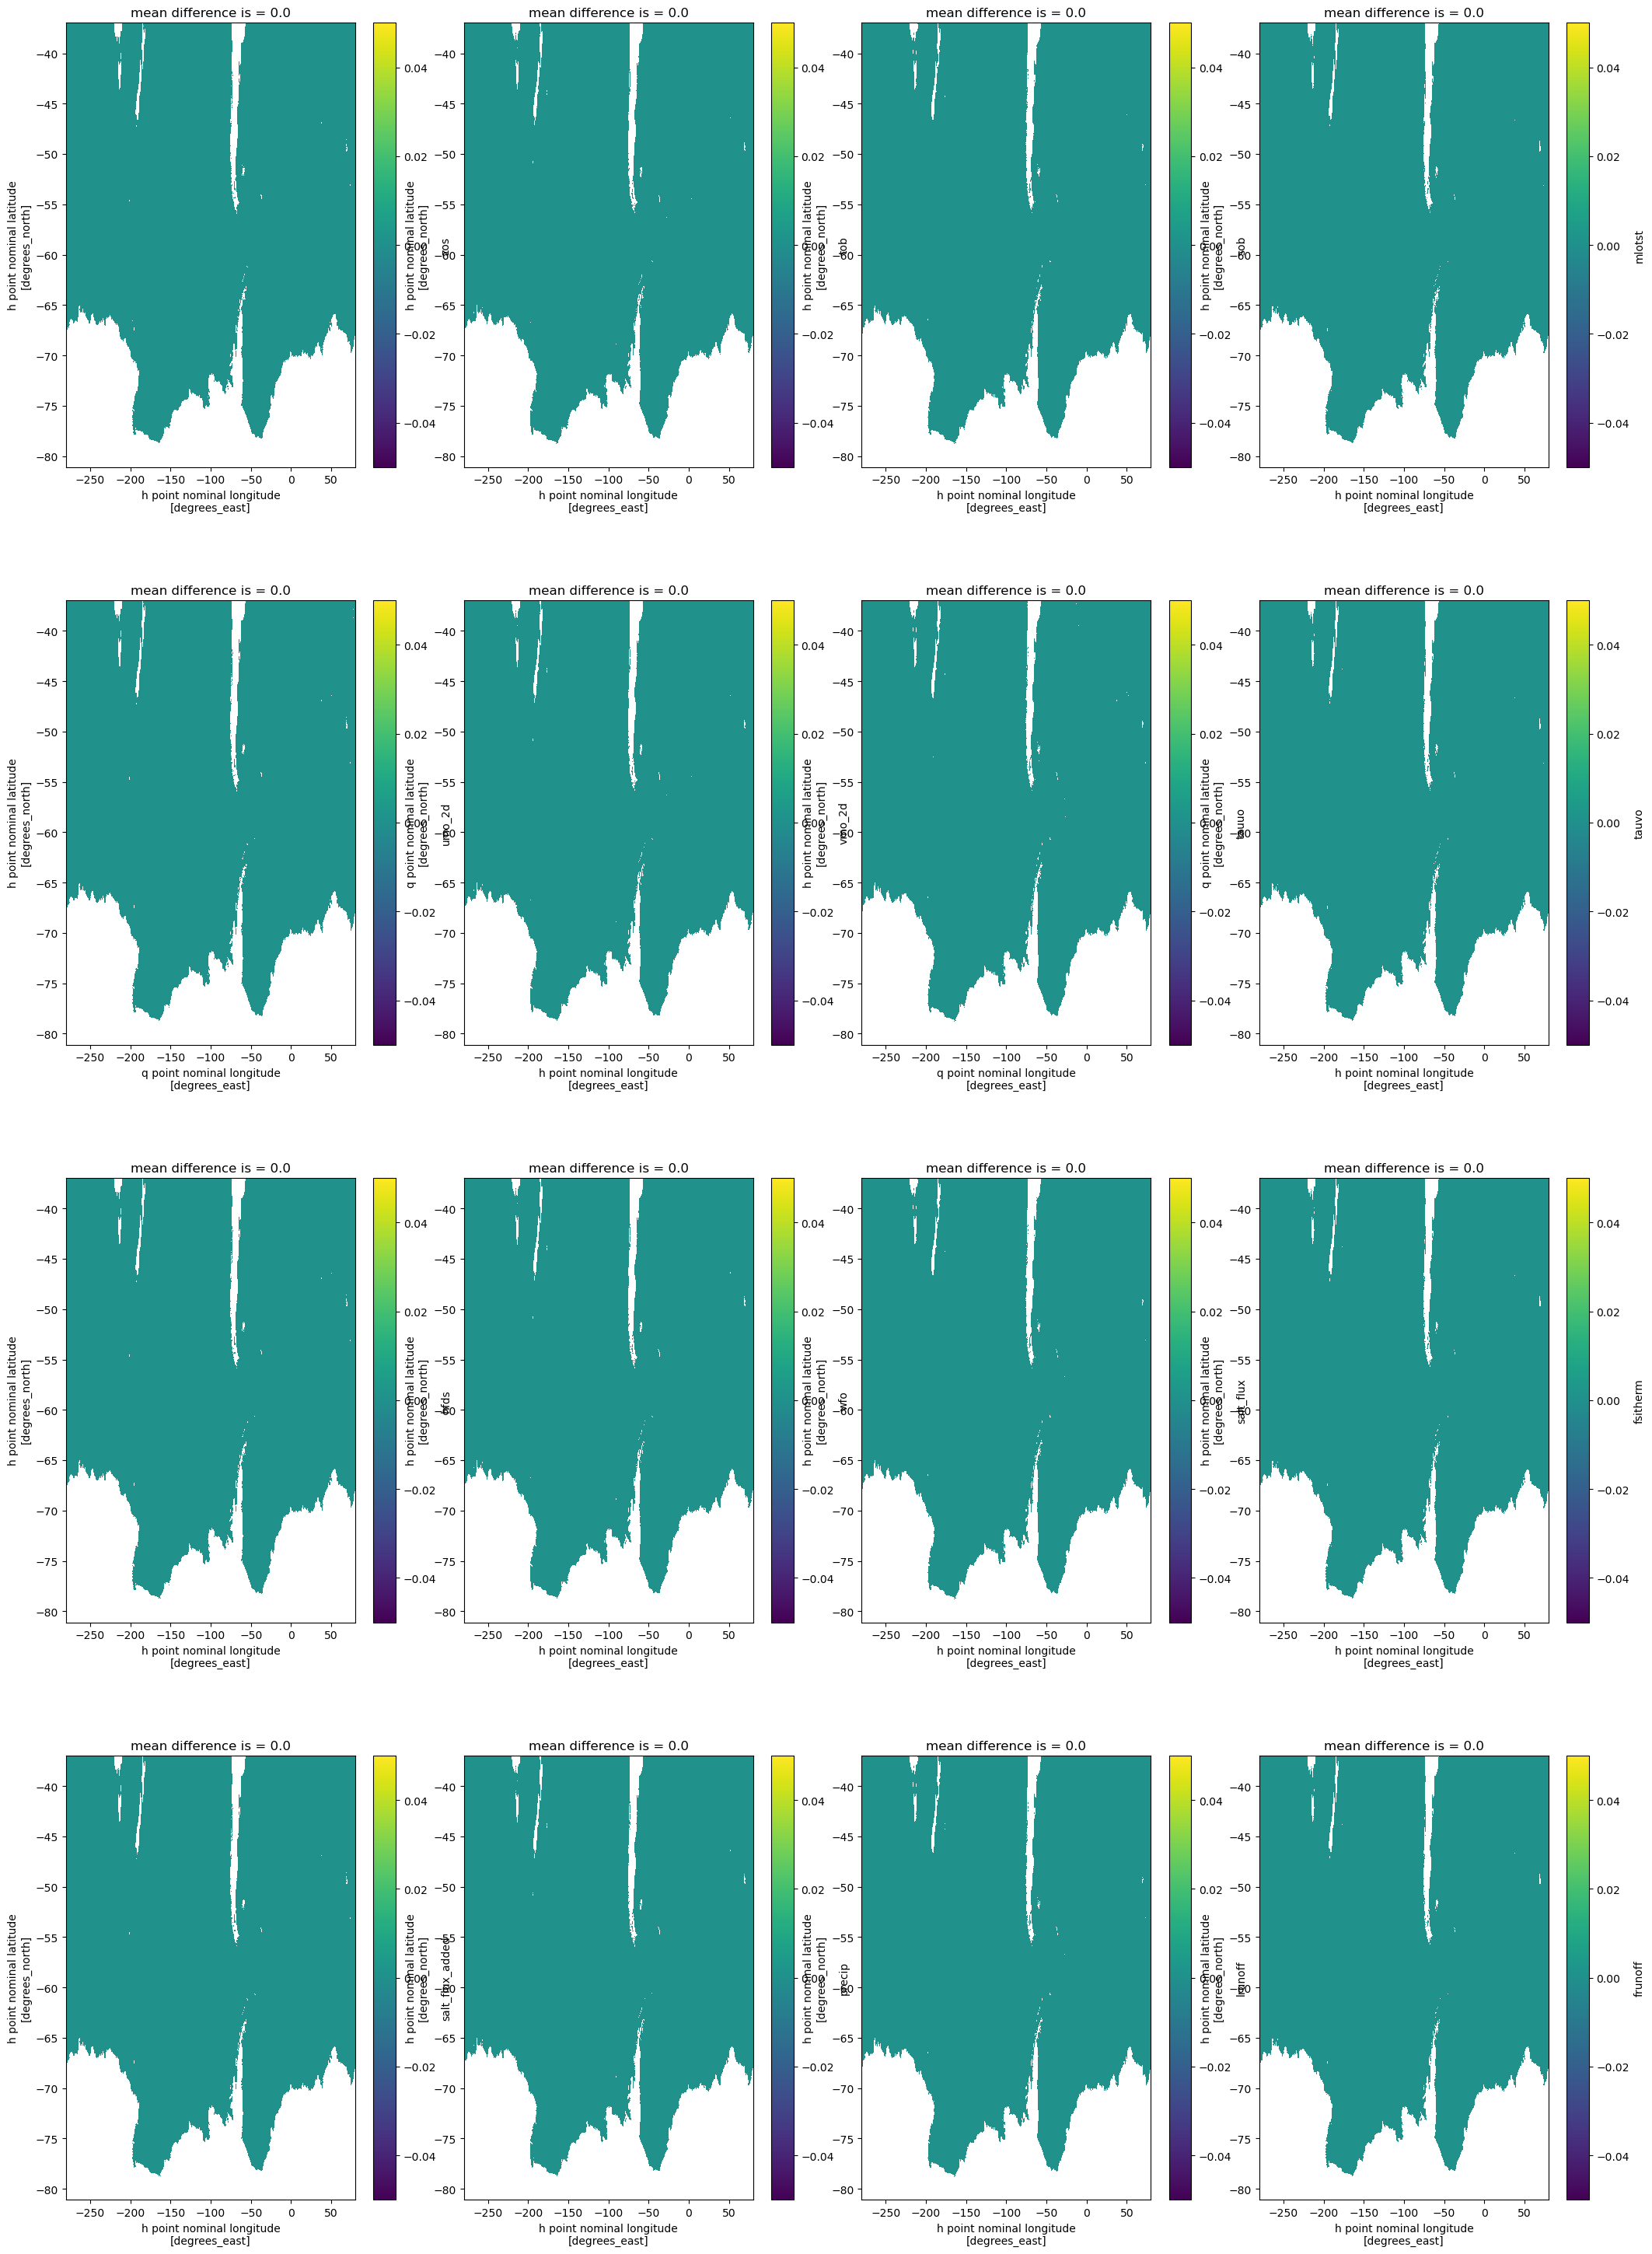

In [46]:
figure = plt.figure(num = 1, figsize = (25, 35))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.3)


plt.subplot(4,4,1)
#zos
Delta_zos_flux=out108diff.isel(time=0).zos.mean().values #mean difference between fields
out108diff.isel(time=0).zos.plot()
plt.title("mean difference is = " +str(Delta_zos_flux))

plt.subplot(4,4,2)
#tob
Delta_tob_flux=out108diff.isel(time=0).tob.mean().values #mean difference between fields
out108diff.isel(time=0).tob.plot()
plt.title("mean difference is = " +str(Delta_tob_flux))

plt.subplot(4,4,3)
#sob
Delta_sob_flux=out108diff.isel(time=0).sob.mean().values #mean difference between fields
out108diff.isel(time=0).sob.plot()
plt.title("mean difference is = " +str(Delta_sob_flux))

plt.subplot(4,4,4)
#mlotst
Delta_mlotst_flux=out108diff.isel(time=0).mlotst.mean().values #mean difference between fields
out108diff.isel(time=0).mlotst.plot()
plt.title("mean difference is = " +str(Delta_mlotst_flux))

plt.subplot(4,4,5)
#umo_2d
Delta_umo_2d_flux=out108diff.isel(time=0).umo_2d.mean().values #mean difference between fields
out108diff.isel(time=0).umo_2d.plot()
plt.title("mean difference is = " +str(Delta_umo_2d_flux))

plt.subplot(4,4,6)
#vmo_2d
Delta_vmo_2d_flux=out108diff.isel(time=0).vmo_2d.mean().values #mean difference between fields
out108diff.isel(time=0).vmo_2d.plot()
plt.title("mean difference is = " +str(Delta_vmo_2d_flux))


plt.subplot(4,4,7)
#tauuo
Delta_tauuo_flux=out108diff.isel(time=0).tauuo.mean().values #mean difference between fields
out108diff.isel(time=0).tauuo.plot()
plt.title("mean difference is = " +str(Delta_tauuo_flux))

plt.subplot(4,4,8)
#tauvo
Delta_tauvo_flux=out108diff.isel(time=0).tauvo.mean().values #mean difference between fields
out108diff.isel(time=0).tauvo.plot()
plt.title("mean difference is = " +str(Delta_tauvo_flux))

plt.subplot(4,4,9)
#hdfs
Delta_hfds_flux=out108diff.isel(time=0).hfds.mean().values #mean difference between fields
out108diff.isel(time=0).hfds.plot()
plt.title("mean difference is = " +str(Delta_hfds_flux))

plt.subplot(4,4,10)
#wfo
Delta_wfo_flux=out108diff.isel(time=0).wfo.mean().values #mean difference between fields
out108diff.isel(time=0).wfo.plot()
plt.title("mean difference is = " +str(Delta_wfo_flux))

plt.subplot(4,4,11)
#salt_flux
Delta_salt_flux=out108diff.isel(time=0).salt_flux.mean().values #mean difference between fields
out108diff.isel(time=0).salt_flux.plot()
plt.title("mean difference is = " +str(Delta_salt_flux))

plt.subplot(4,4,12)
#fsitherm
Delta_fsitherm=out108diff.isel(time=0).fsitherm.mean().values #mean difference between fields
out108diff.isel(time=0).fsitherm.plot()
plt.title("mean difference is = " +str(Delta_fsitherm))

plt.subplot(4,4,13)
#salt_flux_added
Delta_salt_flux_added=out108diff.isel(time=0).salt_flux_added.mean().values #mean difference between fields
out108diff.isel(time=0).salt_flux_added.plot()
plt.title("mean difference is = " +str(Delta_salt_flux_added))

plt.subplot(4,4,14)
#precip
Delta_precip=out108diff.isel(time=0).precip.mean().values #mean difference between fields
out108diff.isel(time=0).precip.plot()
plt.title("mean difference is = " +str(Delta_precip))

plt.subplot(4,4,15)
#lrunoff
Delta_lrunoff=out108diff.isel(time=0).lrunoff.mean().values #mean difference between fields
out108diff.isel(time=0).lrunoff.plot()
plt.title("mean difference is = " +str(Delta_lrunoff))

plt.subplot(4,4,16)
#frunoff
Delta_frunoff=out108diff.isel(time=0).frunoff.mean().values #mean difference between fields
out108diff.isel(time=0).frunoff.plot()
plt.title("mean difference is = " +str(Delta_frunoff))

plt.savefig(figdir+"output108diff_ocean_month.png",bbox_inches='tight',dpi=300)

## 2d ice_month

#### output108

In [47]:
#on backup folder
BU108_ice_month=xr.open_dataset('/scratch/oz91/wf4500/panan_BU_tiles/output108/20000101.ice_month.nc')
#on gdata/ik11
SEP108_ice_month=xr.open_dataset('/scratch/oz91/wf4500/panan_BU_SEP22nd/output108/20000101.ice_month.nc')


In [48]:
iceout108diff=BU108_ice_month - SEP108_ice_month

In [49]:
iceout108diff

<xarray.Dataset>
Dimensions:     (xT: 14400, xTe: 14401, yT: 3383, yTe: 3384, time: 1, nv: 2,
                 xB: 14401, yB: 3384)
Coordinates:
  * xT          (xT) float64 -280.0 -280.0 -279.9 -279.9 ... 79.94 79.96 79.99
  * xTe         (xTe) float64 -280.0 -280.0 -279.9 -279.9 ... 79.95 79.97 80.0
  * yT          (yT) float64 -81.09 -81.08 -81.07 ... -37.03 -37.01 -36.99
  * yTe         (yTe) float64 -81.1 -81.09 -81.08 -81.07 ... -37.02 -37.0 -36.98
  * time        (time) object 2000-01-16 12:00:00
  * nv          (nv) float64 1.0 2.0
  * xB          (xB) float64 -280.0 -280.0 -279.9 -279.9 ... 79.95 79.97 80.0
  * yB          (yB) float64 -81.1 -81.09 -81.08 -81.07 ... -37.02 -37.0 -36.98
Data variables:
    siconc      (time, yT, xT) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    sithick     (time, yT, xT) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    net_melt    (time, yT, xT) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    IX_TRANS    (time, yT, xB) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    IY_TRANS    (time, yB, xT) float32 nan nan nan nan nan ... nan nan nan nan
    average_T1  (time) timedelta64[ns] 00:00:00
    average_T2  (time) timedelta64[ns] 00:00:00
    average_DT  (time) timedelta64[ns] 00:00:00
    time_bnds   (time, nv) timedelta64[ns] 00:00:00 00:00:00

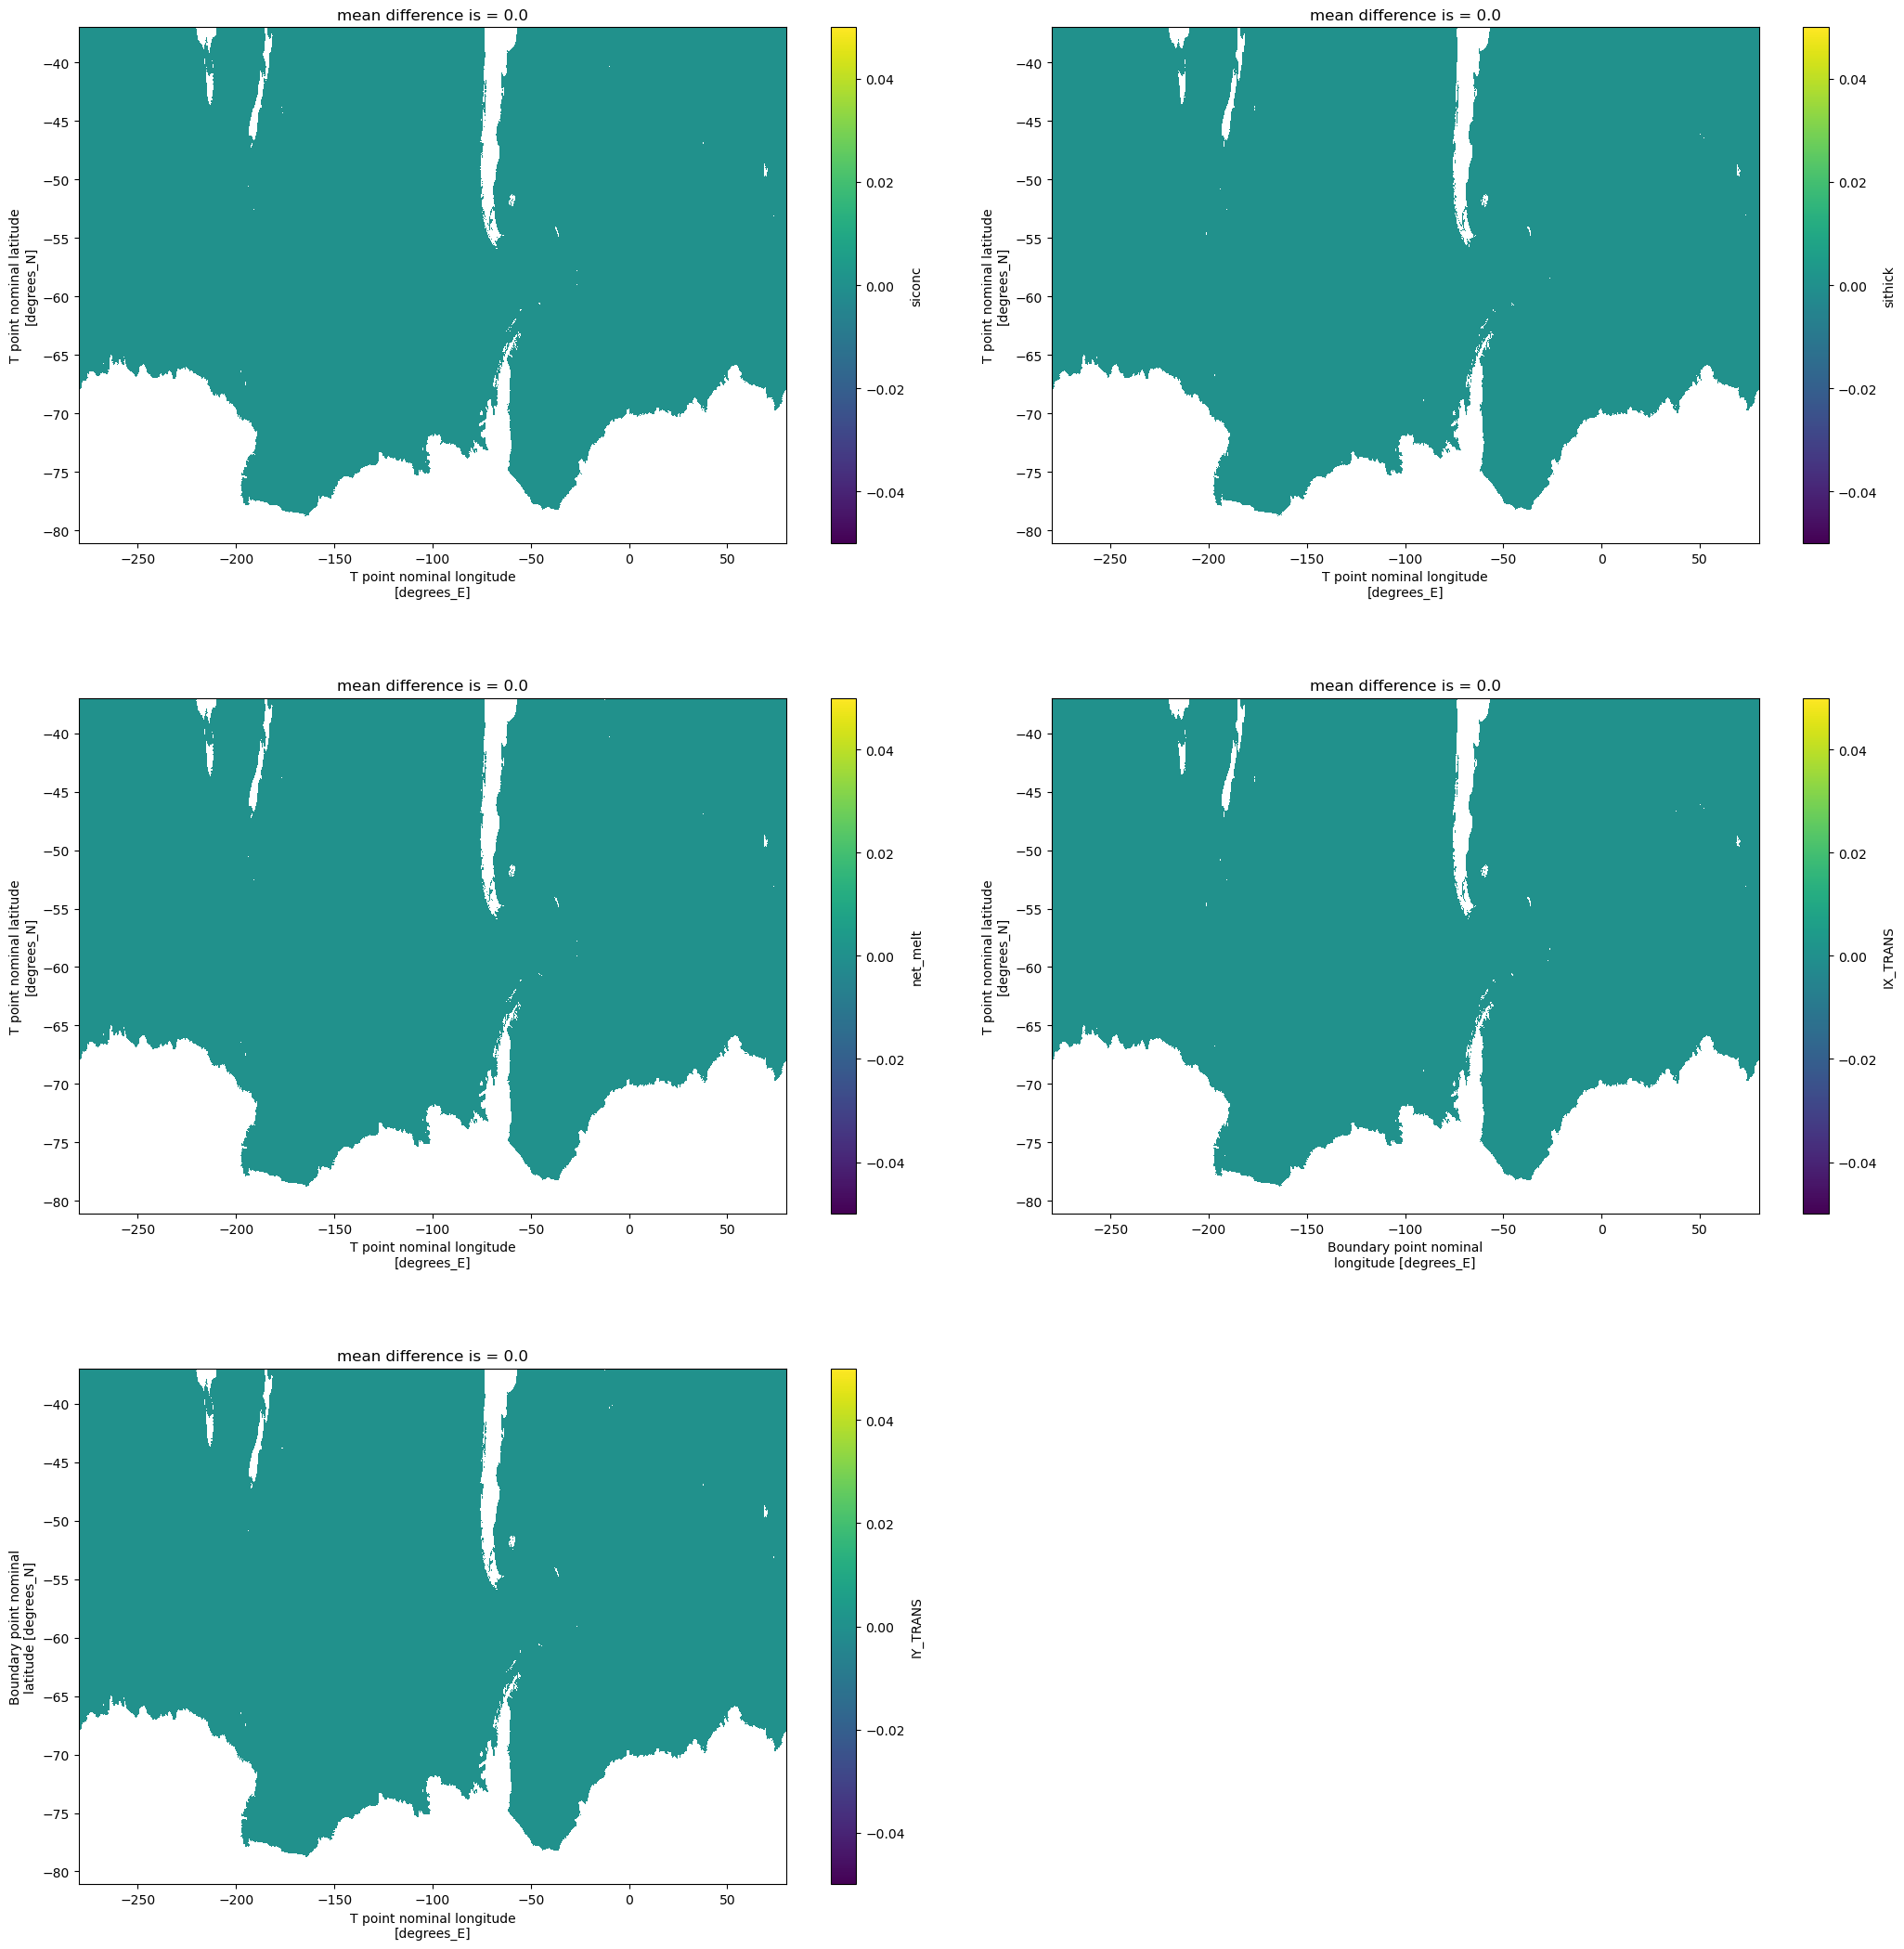

In [55]:
figure = plt.figure(num = 1, figsize = (25, 25))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.3)


plt.subplot(3,2,1)
#siconc
Delta_siconc=iceout108diff.isel(time=0).siconc.mean().values #mean difference between fields
iceout108diff.isel(time=0).siconc.plot()
plt.title("mean difference is = " +str(Delta_siconc))

plt.subplot(3,2,2)
#sithick
Delta_sithick=iceout108diff.isel(time=0).sithick.mean().values #mean difference between fields
iceout108diff.isel(time=0).sithick.plot()
plt.title("mean difference is = " +str(Delta_sithick))

plt.subplot(3,2,3)
#net_melt
Delta_net_melt=iceout108diff.isel(time=0).net_melt.mean().values #mean difference between fields
iceout108diff.isel(time=0).net_melt.plot()
plt.title("mean difference is = " +str(Delta_net_melt))

plt.subplot(3,2,4)
#IX_TRANS
Delta_IX_TRANS=iceout108diff.isel(time=0).IX_TRANS.mean().values #mean difference between fields
iceout108diff.isel(time=0).IX_TRANS.plot()
plt.title("mean difference is = " +str(Delta_IX_TRANS))

plt.subplot(3,2,5)
#IY_TRANS
Delta_IY_TRANS=iceout108diff.isel(time=0).IY_TRANS.mean().values #mean difference between fields
iceout108diff.isel(time=0).IY_TRANS.plot()
plt.title("mean difference is = " +str(Delta_IY_TRANS))


plt.savefig(figdir+"output108diff_ice_month.png",bbox_inches='tight',dpi=300)

Sea ice variables also show that the result is reproducible. Based on these comparissons we can assume the model run is reproducible. One caveat tho is thar we did not compare 3d variables, or high frequency ones. But since sob and tob are subsamples of 3d data, and were compared, then we have no reason to believe a comparisson of 3d variales would yield different results